In [1]:
# YOLOv8 Pose Tracking for Salamah
# استخدم هذا الكود في Google Colab فقط

!pip install ultralytics opencv-python matplotlib --quiet

from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from PIL import Image
import random
import time

# تحميل نموذج YOLOv8 pose
model = YOLO('yolov8n-pose.pt')  # استخدم n (Nano) لأنه أخف وأسرع

# مسار الفيديو (حمّله مسبقًا)
video_path = '/content/match2_converted_short.mp4'
cap = cv2.VideoCapture(video_path)

# بيانات اللاعب الوهمية
def generate_fake_info():
    return {
        'Name': 'Ahmed Alrashid',
        'Age': 23,
        'ID': '2023010456',
        'Heart Rate': random.randint(90, 150),
        'Oxygen': random.randint(92, 100),
        'Stress': random.randint(1, 10)
    }

frame_count = 0
while cap.isOpened() and frame_count < 300:
    success, frame = cap.read()
    if not success:
        break

    results = model.predict(frame, verbose=False)
    result_frame = results[0].plot()

    # إضافة بيانات وهمية لكل لاعب مكتشف
    info = generate_fake_info()
    y_offset = 30
    for key, val in info.items():
        cv2.putText(result_frame, f"{key}: {val}", (10, y_offset), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 2)
        y_offset += 30

    # عرض الفريم داخل كولاب
    img = cv2.cvtColor(result_frame, cv2.COLOR_BGR2RGB)
    pil_img = Image.fromarray(img)
    clear_output(wait=True)
    display(pil_img)

    frame_count += 1
    time.sleep(0.05)

cap.release()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.5/983.5 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.5 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultra

100%|██████████| 6.52M/6.52M [00:00<00:00, 79.3MB/s]


In [2]:
from google.colab import files
uploaded = files.upload()


Saving match2_converted_short.mp4 to match2_converted_short.mp4


In [3]:
import cv2

cap = cv2.VideoCapture('/content/match2_converted_short.mp4')
print("✅ File loaded" if cap.isOpened() else "❌ Couldn't open the video")

ret, frame = cap.read()
print("✅ Frame loaded" if ret else "❌ Couldn't read the first frame")
cap.release()


✅ File loaded
✅ Frame loaded


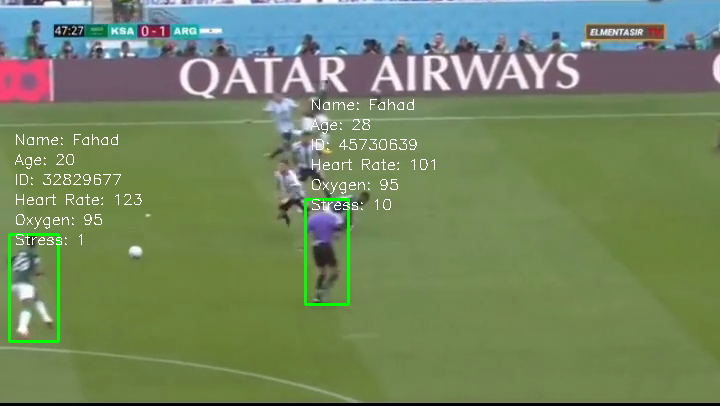

In [5]:
from ultralytics import YOLO
import cv2
from PIL import Image
import random
from IPython.display import display, clear_output
import time

model = YOLO('yolov8n-pose.pt')
cap = cv2.VideoCapture('/content/match2_converted_short.mp4')

# توليد بيانات لكل لاعب
def generate_player_info():
    return {
        'Name': random.choice(['Ahmed', 'Salem', 'Fahad', 'Nasser']),
        'Age': random.randint(20, 30),
        'ID': random.randint(10000000, 99999999),
        'Heart Rate': random.randint(90, 150),
        'Oxygen': random.randint(92, 100),
        'Stress': random.randint(1, 10)
    }

frame_count = 0
while cap.isOpened() and frame_count < 150:
    ret, frame = cap.read()
    if not ret:
        break

    results = model.predict(frame, verbose=False)
    result = results[0]
    annotated = frame.copy()

    # لكل لاعب محدد
    for i, box in enumerate(result.boxes.xyxy):
        x1, y1, x2, y2 = map(int, box)
        info = generate_player_info()

        # ارسم البوكس
        cv2.rectangle(annotated, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # بيانات مخصصة بجنب كل لاعب
        y_offset = y1 - 90 if y1 - 90 > 20 else y1 + 10
        for idx, (k, v) in enumerate(info.items()):
            cv2.putText(annotated, f"{k}: {v}", (x1 + 5, y_offset + idx * 20),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1)

    # عرض الفريم
    rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)
    img = Image.fromarray(rgb)
    clear_output(wait=True)
    display(img)

    time.sleep(0.05)
    frame_count += 1

cap.release()
